# Super Store EDA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('data.csv')
#Data has to be prepared since $ symbol in the last column
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units  Amount
0    MyStore     1        3    2      1     9             Card      3   54.00
1    MyStore     1        3    2      1    10             Cash      7  -17.80
2    MyStore     1        3    2      1    10             Card      7   41.99
3    MyStore     1        3    2      1    11             Card     20  412.50
4    MyStore     1        3    2      1    12             Cash      1  -18.00


# Are all columns relevant?  
No. BranchName is irrelevant, because every row says MyStore. Removed in next cell. 

In [21]:
df.nunique()

Week                  33
DayWeek                7
Day                   31
Month                  7
Hour                  12
Transaction_Type       2
Units                113
Amount              2353
dtype: int64

In [19]:
df.drop('BranchName',axis=1, inplace=True)
df.head()

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00


# How many registers and columns do we have?

There are 4100 rows, and 8 columns (9 before removing 'BranchName').

In [22]:
df.shape

(4100, 8)

# What's the distribution of "Amount"?

The distribution of amount skews slightly to the right, because the below equation returns a positive. It is only a very slightly skewed though. 

In [20]:
((df['Amount'].std())**2) / ((df['Amount'].std())**3)

0.005448441491091678

## Sales by Month, Day and Hour

# How do sales behave along the whole year?

When looking at unit sales, there is a peak in August, and again in December. By amount, however, there is a dip in August, but also a peak in December (probably because of Christmas). 

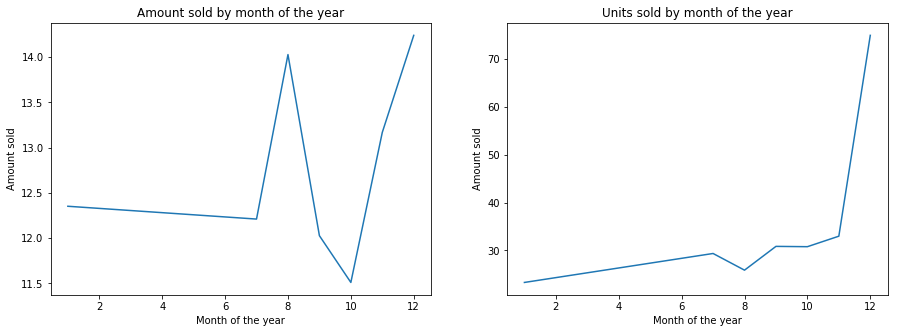

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df.groupby('Month')['Units'].mean().plot()
plt.xlabel('Month of the year')
plt.ylabel('Amount sold')
plt.title('Amount sold by month of the year');

plt.subplot(1, 2, 2)
df.groupby('Month')['Amount'].mean().plot()
plt.xlabel('Month of the year')
plt.ylabel('Amount sold')
plt.title('Units sold by month of the year');

plt.show()

# And what about days in a month? Do sales behave the same way regardless the day?

When looking at amount, there seems to be specific days of the month that perform better. These are most likely the weekends.

When looking at units there is a slightly different shape, but there are also peaks of stronger days. 

We can also see that sales increase towards the end of each week, but looking at Amount by DayWeek.

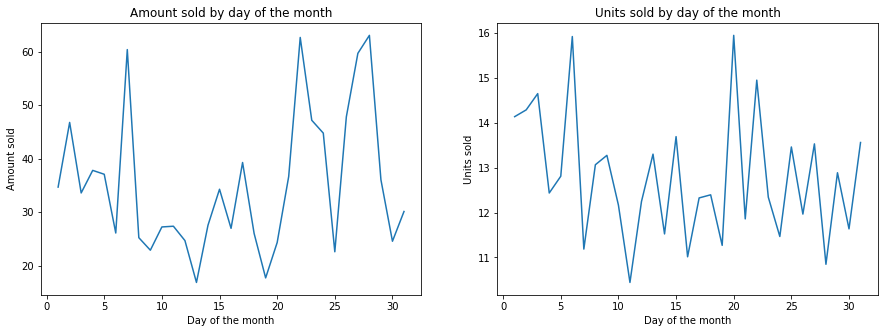

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df.groupby('Day')['Amount'].mean().plot()
plt.xlabel('Day of the month')
plt.ylabel('Amount sold')
plt.title('Amount sold by day of the month');

plt.subplot(1, 2, 2)
df.groupby('Day')['Units'].mean().plot()
plt.xlabel('Day of the month')
plt.ylabel('Units sold')
plt.title('Units sold by day of the month');

plt.show()

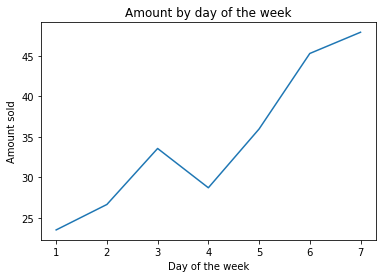

In [46]:
df.groupby('DayWeek')['Amount'].mean().plot()
plt.xlabel('Day of the week')
plt.ylabel('Amount sold')
plt.title('Amount by day of the week');

# Do we have any peak hour of sales?

If we look at Units sold, we can infer that the shop opens at 8 in the morning, an closes at 7pm. Sales peak between 10am and 3pm, and then plummet as time approaches closing. 

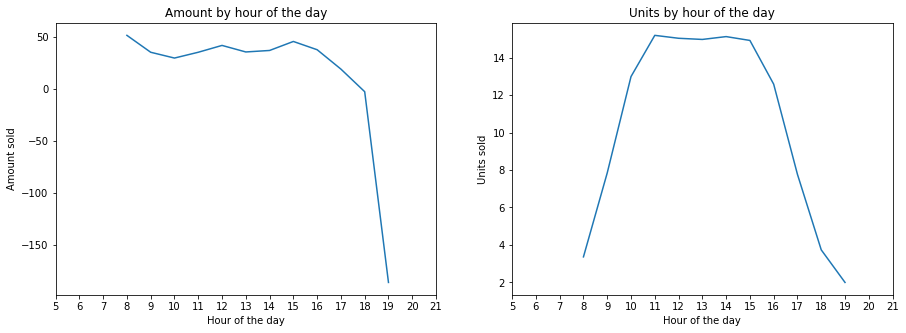

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df.groupby('Hour')['Amount'].mean().plot()
plt.xlabel('Hour of the day')
plt.xticks(range(5,22))
plt.ylabel('Amount sold')
plt.title('Amount by hour of the day');

plt.subplot(1, 2, 2)
df.groupby('Hour')['Units'].mean().plot()
plt.xlabel('Hour of the day')
plt.xticks(range(5,22))
plt.ylabel('Units sold')
plt.title('Units by hour of the day');

plt.show()


I ran the below cross-tab (Amount vs. Transaction type) to see what we can learn, and it appears that all cash transactions are recorded as a negative value in the system. This seems to be skewing what we see when we analyse 'Amount'. 

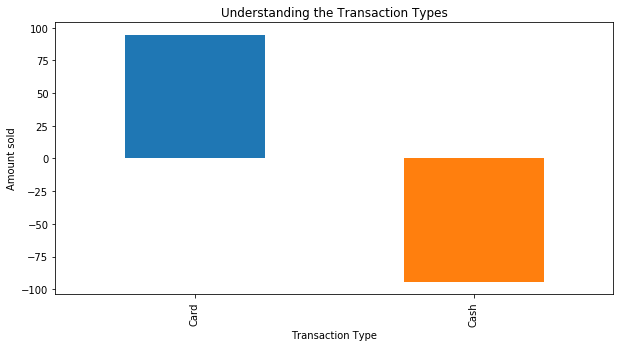

In [55]:
plt.figure(figsize=(10, 5))
df.groupby('Transaction_Type')['Amount'].mean().plot.bar()
plt.xlabel('Transaction Type')
plt.ylabel('Amount sold')
plt.title('Understanding the Transaction Types');